# Data Intelligence - [BBDAINT1KU]
|Wim Rijk Sørensen|wiso@itu.dk|26.05.2021|
|-----------|-----------|-----------|

## Introduction
For this exam, I have chosen to work with the “rentals.csv” data set, which has information about apartments that are being rented out in New York. An analysis of this data is interesting to look at to get a better understanding of the housing market in America’s largest city.

To accomplish this, an initial inception alongside some cleaning of the data will be conducted. Based on this inception of data, a hypothesis will be created to have a direction for the analysis. From the results of the analysis, I will conduct an evaluation which will lead to a discussion about the impact of the findings. Lastly, a conclusion will be made to tie together the knowledge that was gained from the report.

## Libraries
A Python library is a collection of blocks of code that can be used in one’s project. So instead of writing the code from scratch each time a specific function is needed, a library containing the desired functionalities can be imported. It is an easy way to simplify and streamline the way one’ code is written (Advani, 2020).

In the following section, I will explain the libraries that will be used for this report.

### pandas & NumPy
NumPy provide an efficient way of storing data and making operations on data as the arrays become larger in size. A NumPy array is a grid of values and it form a core of the ecosystem on which data science tools in Python are built (VanderPlas, 2016). pandas is a powerful open-source library built on top of NumPy. It is used for its ability to make working with data fast and easy. It utilizes two main data structures, which are Series and DataFrames. A Series is a one-dimensional object, which contains an array whereas a DataFrame is a two-dimensional object, which has a tabular data structure, much like a spreadsheet (McKinney, 2012). A DataFrame offers a convenient structure of data, where the rows and columns are labeled and easily manipulated. 

For this report, the pandas library will be used to structure, clean, manipulate and analyze the given data set.


### matplotlib & seaborn
matplotlib, as the name suggests, is a library used for plotting and visualizing data in 2D. It is multi-platform data visualization library built on NumPy arrays (VanderPlas, 2016). Over the years, it has shown its age, why newer packages have been built on top of its powerful internals. Among these, are Seaborn, which provides simple high-level functions for common statistical plot types (VanderPlas, 2016).

For this report, a combination of these two libraries will be used to visualize the given data set. 

##### note: scikit-learn will be explained in the analysis part

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Data 
By using the function load_data, the data coming from the argument "path" will be read by the pandas method "read_csv". Because the file "rentals.csv" is placed in a folder called “exam-data”, the file path is called “exam-data/rentals.csv”, so it can be linked to the notebook.

In [2]:
def load_data(path):
    return pd.read_csv (path)

## Description of the data

In [3]:
df = load_data("exam-data/rentals.csv")
original_df = df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Initial description of the data
From this data set, we see information about apartment rentals, whether it be an entire apartment, a shared room, or a private room. With the combination of host_names seen, I assume this data comes from a apartment rental company that caters to private house owners, like AirBnB. This also ties in with the fact, that some apartments or rooms are not being rented out the entire 365 days a year. The rows under the feature “name” lists examples such as “Clean & quiet apt home by the park” and “Cozy Entire Floor of Brownstone”, which further indicates that this data is taken from a place like AirBnB, since I have seen titles like these on sites like AirBnB. 

We see that the data set is taken from the city of New York, since the placements of the apartments are set in New York’s boroughs, Manhattan, Queens, Brooklyn, and so on. The price of the apartments varies, which at first glance seems to be affected by whether it is a room or an entire apartment as well as their placements. I will assume that the prices are set per day and are not affected by the number of minimum days it is required to be rented. 

Underneath is a table of some of the features of the data set. These are of particular interest, so they will additionally be explained.

||Name|Definition|
|---:| :- | :- |
|1|neighbourhood_group|The boroughs in New York |
|2|room_type |The type of place that is being rented out|
|3|price|The price of af place per night represented in dollars|
|4|minimum_nights|The minimum nights one needs to rent a place | 
|5|number_of_reviews|The number of reviews per place | 
|6|last_review|The date of the last time a review was made| 
|7|reviews_per_month|The average amount of reviews a place has gotten per month|
|8|calculated_host_listings_count|How many places each host have|
|9|availability_365|How many days a year the place is available for renting out|



I will now explore the data set further with the help of descriptive statistics.

### Descriptive statistics & cleaning
Alongside describing the data set, it is convenient also to clean it, so to minimize confusion about what should be cleaned. Doing it this way bundles the descriptive findings together with the cleaning of the data, so it will be ready for analysis, 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

By using the .info() method, I get an overview of the data. Here we see that the data set consists of 48895 rows and 16 columns. We see under Non-Null that most of the columns consists of filled data, but with the exceptions of ”last_review” and “reviews_per_month”. This will further be explored in with the .isnull() method.

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

With this method we get a better glance at where we are missing data. For the mentioned features, we are missing around a fifth of the data. It is also seen that there are some missing names and host_names, which for the sake of this report won’t be necessary to deal with.

#### Dropping features

In [6]:
columnsToDrop = ["id", "name", "host_id", "host_name"]
df.drop(columnsToDrop, axis=1, inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


For this report, the features of "id", "name", "host_id", "host_name" will be considered irrelevant, since there will be no statistical relevance gained from these features. On that reasoning, these features will be dropped from the DataFrame. This is done to get a clearer overview of the remaining features and to not confuse the reader or myself with irrelevant data.

#### "reviews_per_month" & "last_review"

In [7]:
df["reviews_per_month"].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

A .describe() method is being used to further look at the data within “reviews_per_month” to better examine what to do. Here we see a max value of 58, which would indicate that there are written over around 2 reviews per day for this apartment. Another inspection of this will be made by plotting the data.

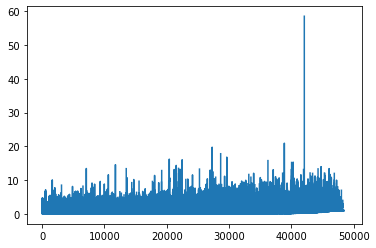

In [8]:
df["reviews_per_month"].plot()

With the plotting, an outlier can be seen, which will be delt with, by removing any data that has a higher average of reviews than 30 per month, since it is not plausible that a place has been occupied more than once a day for a whole month in average.

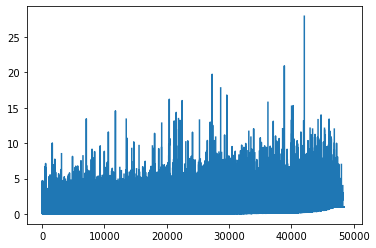

In [9]:
def indexToDropHigher(column, number):
    indexesToDrop = df[(df[column] > number)].index
    df.drop(indexesToDrop , inplace=True)

indexToDropHigher("reviews_per_month", 30)

df["reviews_per_month"].plot()

To remove all rows with an average of above 30 reviews, the function “indexToDropHigher” is being used. It takes two arguments, a column and a number, which indicates the which column it should affect and above which number it should remove the rows. It gets all the indexes of the values over 30 and drops their entire rows.

The new DataFrame is then being plotted to confirm the action. Here we see the highest average review number is slightly under 30, which is plausible, but perhaps not usual. But for this report, this will be granted as valid data.

Now that the outlier is removed the missing values can be filled. Since we saw that the missing data here made up for a fifth of the data set, any action taken to fix it will impact the data set in some extensive way. I will be filling these data out with their mean, so to get an average distribution of this data. These data could have been removed, but it would lose a large part of the data.

In [10]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())

In [11]:
df["last_review"].head()

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

With the method .head() we see that “last_review” are dates, so the missing data can’t be filled with the average, but it can be filled with the method .mode(). This method finds the most common occurrences, which I then use to fill the missing data. The most occurring date is firstly found to see which date the missing values will be filled with.

In [12]:
df["last_review"].mode()[0]

'2019-06-23'

In [13]:
df["last_review"] = df["last_review"].fillna(df["last_review"].mode()[0])

In [14]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

By running the .isnull() again, we see that all features are filled and there are no more missing values.

We can now begin to look at and clean up the data.

#### "price"

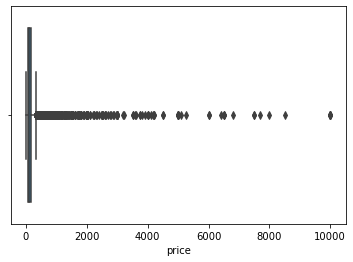

In [15]:
ax = sns.boxplot(x=df["price"])

By making a box plot, it is possible to see where they outliers are. Since it can be seen from this box plot, that the whole data set is skewed towards the left, most of the outliers that are at the right will be removed. The right dots in the box plot represents the expensive apartments in New York. Some of these tops at 10.000 dollars, which might be an error or just extremely expensive apartment, but they will be removed for the sake of this report. There are also dots on the left, but since the whole box plot is skewed to the left, there are harder to see.

To do remove the outliers, I create a top 10% and a bottom 10% of the prices, these values will be used for quantile-based flooring and capping (Singh, 2019). By doing this the extreme outliers will be selected. Then an index of all these values will be created whereafter they will be dropped from the DataFrame.

In [16]:
low_10 = df["price"].quantile(0.10)
high_10 = df["price"].quantile(0.90)
print(high_10)

index = df[(df['price'] >= high_10)|(df['price'] <= low_10)].index
df.drop(index, inplace=True)
df['price'].describe()

269.0


count    38956.000000
mean       121.607634
std         55.457773
min         50.000000
25%         75.000000
50%        107.000000
75%        155.000000
max        268.000000
Name: price, dtype: float64

The .describe() method is used to check the new top and bottom values, which are 50 dollars and 268 dollars. These will be represented in the new box plot underneath. 

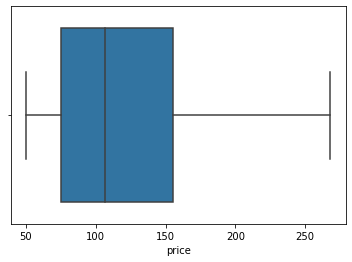

In [17]:
ax = sns.boxplot(x=df["price"])

#### Price, neighbourhood_group & room type

Now we will visualize the price differences between the room types in the different boroughs. This is done by firstly using the .groupby() metod to group “room_type” and “neighbourhood_group” and looking at the mean price they have. Hereafter the specific rooms are selected and plotted to show three graphs with the price differences compared. 

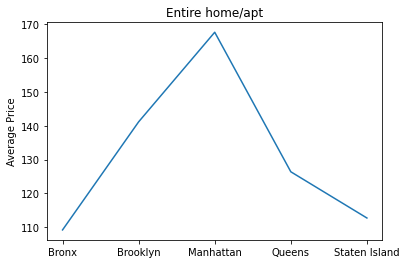

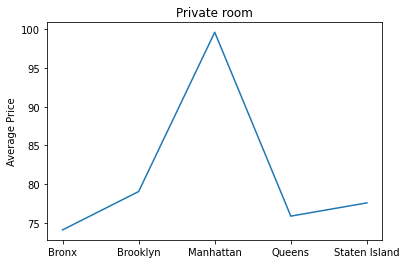

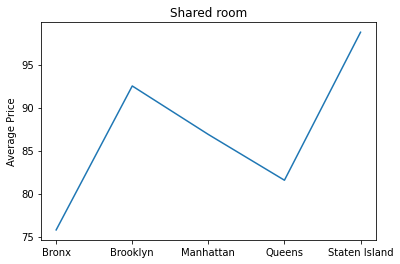

In [18]:
plot1 = plt.figure(1)
plt.ylabel('Average Price')
plt.title("Entire home/apt")
plt.plot(df.groupby(["room_type", "neighbourhood_group"])["price"].mean()["Entire home/apt"])


plot2 = plt.figure(2)
plt.ylabel('Average Price')
plt.title("Private room")
plt.plot(df.groupby(["room_type", "neighbourhood_group"])["price"].mean()["Private room"])

plot3 = plt.figure(3)
plt.plot(df.groupby(["room_type", "neighbourhood_group"])["price"].mean()["Shared room"])
plt.ylabel('Average Price')
plt.title("Shared room")

plt.show()

Here we see that Manhattan is the most expensive borough, when it comes to renting an entire home or a private room, but Brooklyn is more expensive in the shared room. Bronx is the overall cheapest place to rent any type.

#### "neighbourhood_group"

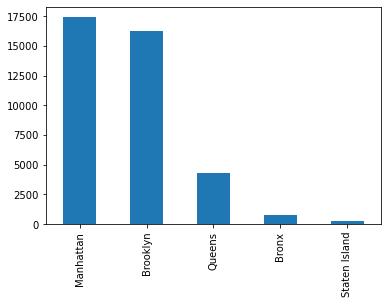

In [19]:
df["neighbourhood_group"].value_counts().plot.bar()

In the “neighbourhood_group” feature we see a rather uneven distribution of apartments, where the majority of places are either in Manhattan or Brooklyn. For now, this will stay untouched, but this knowledge is nice to have, when the analysis is starting 

#### "room_type"

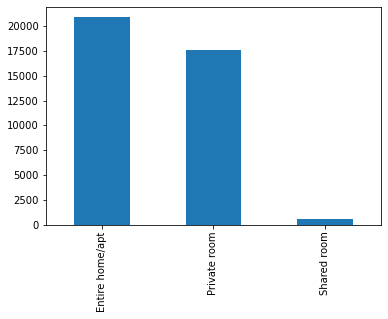

In [20]:
df["room_type"].value_counts().plot.bar()

Here we also see an uneven distribution, with a small amount of “Shared Rooms”.

#### "longitude" and "latitude"

In [21]:
df["longitude"].describe()

count    38956.000000
mean       -73.952843
std          0.044771
min        -74.244420
25%        -73.982670
50%        -73.955700
75%        -73.938290
max        -73.712990
Name: longitude, dtype: float64

In [22]:
df["latitude"].describe()

count    38956.000000
mean        40.729541
std          0.054187
min         40.499790
25%         40.690370
50%         40.723075
75%         40.764030
max         40.911690
Name: latitude, dtype: float64

These two might be useful later in the analysis also, so by giving them an inception, we see that their standard divination is not that high, meaning they don’t differ that much from each other. This can also be inferred from a look at the quartiles, which are all placed around the same. There should be no real outliers in these two features. The overall meaning of this is to show, that the places are all bundled together in the same city, as we are looking at coordinates. This shows us, that there are most likely no apartment from other cities in this data set. 

Underneath, we see the coordinates being plotted, which then represents New York. This is done to confirm, that none of the listings are placed outside New York by a mistake.

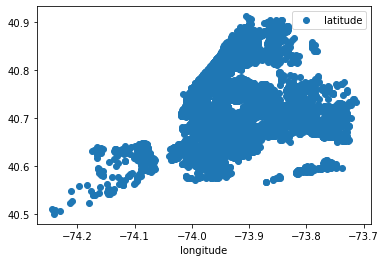

In [23]:
df.plot(x='longitude', y='latitude', style='o')

#### "minimum_nights"

In [24]:
df.loc[df['minimum_nights'] > 365]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.090000,1,365
5767,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.030000,1,365
7355,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.570000,1,90
8014,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,2019-06-23,1.371751,1,362
10829,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,2019-06-23,1.371751,1,365
11193,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.220000,1,365
13404,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.070000,1,42
15946,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,2019-06-23,1.371751,1,365
26341,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.120000,6,249
34487,Brooklyn,Bedford-Stuyvesant,40.69974,-73.94658,Private room,50,400,0,2019-06-23,1.371751,1,90


Here we look at how many places have a requirement of more than a year’s rent. This might not be wrong, but since I have concluded that these are listings on a site like AirBnB, I think renting a house for more than a year should be done through a proper rental company. Also, many of these places have a requirement of more than 500 days, which Is more than 1,3 years, and some are at a 1000 days, which is around 3 years. That is why these are being removed from the data set.

These are being removed with the same function as mentioned earlier “indexToDropHigher”

In [25]:
indexToDropHigher("minimum_nights", 365)

In [26]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.371751,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48889,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2019-06-23,1.371751,2,163
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.371751,2,9
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.371751,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.371751,6,2


### Ending remarks on visualization and cleaning
Based on the visualization and cleaning of the data set, we have seen some interesting parts, which are useful to keep in mind for the analysis. These are:
-	There is a skewed amount of listings from the different boroughs, with the most apartments being in Manhattan and Brooklyn. This will have an effect on the machine learning model that will later be created
-	There is a skewed amount of room types, with almost no Shared Rooms, but a roughly equal amount of entire apartments and private rooms

Benefits from cleaning:
-	By cleaning the data set, I have seen and removed outliers, which are done to further condense the data set and help create a better overall average of the rental listings in New York
-	Places with more than 1 review per day are removed, since that might be scammers creating fake reviews for their own place. 


# Hypothesis
As observed in the sections above, this data set revolves around the rentals of apartment in a AirBnB type way. Based on the learnings, I wish to test the following hypothesis:

> *The borough an apartment is placed within can be predicted based on its price, availability and reviews.*

This hypothesis will be tested in the next section.

# Analysis
For the analysis, I will be conducting machine learning using the scikit-learn library. scikit-learn or sklearn is a package with a wide range of algorithms used for machine learning. scikit-learn has a clean and straightforward API for easy use (VanderPlas, 2016). The data are represented in a table, which can be a pandas DataFrame. For this table, the rows are referred to as samples and the columns as features. The samples are the individual objects described in the data set, which can be any set of quantitative measurements. The features are the observations that describe each sample. This can be understood as the titles for the data (VanderPlas, 2016).

Machine learning is used to create models, to make predictions that are based on the data set. From the data set, it will find the connection of the data and use that to make predictions of upon new unknown information. 

## Random Forest Classification
To check the hypothesis, a random forest classifier will be used. A random forest classifier is a powerful machine learning algorithm that’s made up by an ensemble of randomized decision trees (VanderPlas, 2016: Yiu, 2019). This combination of decision trees creates an overall robust result. A random forest is used to classify objects, for example to predict which category a loan applicant falls in or to figure out which decease a patient have based on their symptoms. 

A random forest classifier is used over a linear regression model, since a linear regression is used when one wants to predict a value based upon another value. A linear regression model is able to predict values of a continues range (VanderPlas, 2016). But f

For this report, a classificaton model will be used to predict within which borough an apartment is located, which can't be achieved by a linear regression.

Firstly, a function to split the data set will be created. This is done so to test the model we will later insatiate. By splitting the data set, we are able to train the model on 80% of the data and then test it with adding the remaining 20%. If this split were not made, the model would make perfect predictions, since it knows every aspect of the data set. By leaving out 20%, we can, after its training, test the model and check it against the actual values. This way it is possible to know how well the model will perform when seeing unknown data in the future.

In [27]:
def split_data(dataframe, predictors, target, test_size=0.2):
    X = dataframe[predictors]
    y = dataframe[target]
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
        test_size=test_size, random_state=np.random.RandomState(0))
    return X_train, X_test, y_train, y_test

Now that the function to split the data set is created, it can be used in the following function. Here we put in the desired features, that we want to use to predict the “neighbourhood_group”. These are the input_features: ["price", "number_of_reviews", "reviews_per_month", "availability_365"]. The target for the model to predict is the categorial feature “neighbourhood_group”. The model will be fitted to the training data, which is seen by the “model.fit(X_train, y_train)”, whereafter the model predicts the unknown test data. In the test_report the actual values and the predicted values will be compared and a test report a will be created. 

In [28]:
def random_forest_classification(dataframe, input_features):
    rng = np.random.RandomState(0)
    X_train, X_test, y_train, y_test = split_data(dataframe, input_features, "neighbourhood_group")

    model = sklearn.ensemble.RandomForestClassifier(random_state=rng)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    test_report = sklearn.metrics.classification_report(y_test, preds)
    print(test_report)
    feature_importances = "\n\t".join(f"{feature}: {importance:.2f}" for feature, importance in zip(input_features, model.feature_importances_))
    print(f"Feature importances:\n\t{feature_importances}")
    
    return model, preds, y_test

model, preds, y_test = random_forest_classification(df, ["price", "number_of_reviews", "reviews_per_month", "availability_365"])

               precision    recall  f1-score   support

        Bronx       0.09      0.02      0.03       145
     Brooklyn       0.48      0.53      0.50      3235
    Manhattan       0.54      0.60      0.57      3484
       Queens       0.25      0.11      0.15       867
Staten Island       0.00      0.00      0.00        58

     accuracy                           0.50      7789
    macro avg       0.27      0.25      0.25      7789
 weighted avg       0.47      0.50      0.48      7789

Feature importances:
	price: 0.26
	number_of_reviews: 0.21
	reviews_per_month: 0.29
	availability_365: 0.25


## Evaluation
As touched upon earlier, there is an uneven distribution in the data set. We see from the test report, that Bronx and Staten Island scores some low numbers in both precision and recall. This is because they are not that represented in the data, which will lower the overall score of the model.


### Precision 
Precision is calculated by the number of times a member of a class is correctly identified divided by the total times that member has been predicted (Kreiger, 2020). If we try to predict a type of fruit, let’s say an apple, the precision is the number of correctly identified apples divided by the number of total predictions on apples, even if the prediction were correct or incorrect. 

For this model we see the weighted average for the precision is: 0.47. This means that the “neighbourhood_group” or boroughs were correctly identified about half of the times they were predicted. 

### Recall
Recall is calculated by the number of times a member of a class is correctly identified divided by the total number of members in that class (Kreiger, 2020). For the fruit example, the number of correctly identified apples are divided by the total number of apples. 

We see the weighted average for the recall is: 0.50. This means that half of the total number of boroughs were predicted correctly.

### F1 score
The F1 score is a weighted average of the precision and recall. 1 being the best score and 0 being the worst score. It is a quick way to tell if the model is good at making predictions. If both precision and recall are high, the F1-score will be high, and it will be low if one of them are low (Kreiger, 2020).

With a weighted average F1 score of: 0.48, this model does not have the strongest classification abilities. It is said that the model can be evaluated by its ability to predict better than a random choice, so let’s check that. We have 5 boroughs, which would end up getting an equal 20% chance of each borough to be predicted. So, in that regard, a model to be 48% arcuate is not that bad. It certainly needs to be better, but it is superior to a random guess.

Furthermore, we see, as expected, that Bronx and Staten Island have very low, even nonexistent, results. This is due to the uneven data set, as we saw in the visualizations.

### Feature importances
We see that the feature importance shows us that the features are roughly evenly important when predicting new data.



### Further visualization of evaluation
To see visualize the model’s prediction, a new DataFrame is made. Here the actual values are put into the first column and the predictions made by the model into the next column. A comparison column is created by using np.where, which returns True or False if the values are the same or not. This comparison list is then added to the new DataFrame. To limit the visualization, the DataFrame is narrowed to the first 30 rows. By using the function color_rows(), every row in the comparison column that are of the value True get colored green. 

In [29]:
score_df = pd.DataFrame({'Actual neighbourhood_group':y_test, 'Predicted neighbourhood_group':preds})

comparison_column = np.where(score_df["Actual neighbourhood_group"] == score_df["Predicted neighbourhood_group"], True, False)

score_df['Comparison'] = comparison_column.tolist()
new_score = score_df.head(30).copy()


def color_rows(val):
    color = 'lightGreen' if val == True else ''
    return 'background-color: %s' % color

new_score.style.applymap(color_rows)

,Actual neighbourhood_group,Predicted neighbourhood_group,Comparison
30164,Brooklyn,Manhattan,False
3224,Manhattan,Manhattan,True
47149,Manhattan,Manhattan,True
41914,Brooklyn,Manhattan,False
48442,Brooklyn,Brooklyn,True
22196,Brooklyn,Brooklyn,True
3053,Queens,Manhattan,False
23574,Brooklyn,Manhattan,False
6754,Manhattan,Brooklyn,False
44156,Manhattan,Manhattan,True


This show us that approximately two thirds of the predictions were correct. If the data set that were shown were larger, it would match the F1 score's results.

## Revise hypothesis

As we have gotten a F1-score of 0.48 with the use of these features: ["price", "number_of_reviews", "reviews_per_month", "availability_365"], I will try to encode the categorical values of room_type to see if they provide a better score for the model.

### OneHotEncoder
To encode the categorical value, I have chosen the method of OneHotEncode. This method is used when encoding values that are unordered, like room_type, where we have “Shared room”, “Private Room” and “Entire apt/home”. Perhaps one could argue that there is some order in these, as they go from complexly private to shared, but for this report, this argument will not be made. Instead, these values will be treated as unordered. This is done because the machine learning algorithm will assume that there is a hierarchy to the values, if they are simply label 1,2, and 3 and not OneHotEncoded. 

The OneHotEncoder create a new column for each room_type and notes if the row contains that particular room type or not. This leads us with three new columns, ohe_apt, ohe_private, and ohe_shared, where the row will be filled with a 1.0 if it belongs to the room type labeled in the column. This way, there will be no hierarchy between the room_types and they can be used for a random forest classifier.

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

room_type_df = df[["room_type"]].copy()

result = ohe.fit_transform(room_type_df)

room_type_df = pd.DataFrame(result)

print(ohe.categories_)
room_type_df.columns =['ohe_apt', 'ohe_private', 'ohe_shared']
room_type_df

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]


,ohe_apt,ohe_private,ohe_shared
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
38939,0.0,1.0,0.0
38940,0.0,1.0,0.0
38941,1.0,0.0,0.0
38942,0.0,0.0,1.0


Next, the DataFrame, to which we want to add the newly encoded room types, have gotten a reset index, so it will match the indexes from the room_type_df. Then the two are combined into one extended DataFrame. 

In [31]:
df = df.reset_index()
del df['index']

extended_df = pd.concat([df, room_type_df], axis=1)
extended_df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ohe_apt,ohe_private,ohe_shared
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,0.0,1.0,0.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,1.0,0.0,0.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.371751,1,365,0.0,1.0,0.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,1.0,0.0,0.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38939,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2019-06-23,1.371751,2,163,0.0,1.0,0.0
38940,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.371751,2,9,0.0,1.0,0.0
38941,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.371751,1,27,1.0,0.0,0.0
38942,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.371751,6,2,0.0,0.0,1.0


### Random Forest Classification #2
A new Random Forest Classification will be created based on the newly encoded values.

In [32]:
random_forest_classification(extended_df, ["ohe_apt", "ohe_private", "ohe_shared"])

               precision    recall  f1-score   support

        Bronx       0.00      0.00      0.00       145
     Brooklyn       0.44      0.48      0.46      3235
    Manhattan       0.49      0.60      0.54      3484
       Queens       0.00      0.00      0.00       867
Staten Island       0.00      0.00      0.00        58

     accuracy                           0.47      7789
    macro avg       0.19      0.22      0.20      7789
 weighted avg       0.40      0.47      0.43      7789

Feature importances:
	ohe_apt: 0.30
	ohe_private: 0.48
	ohe_shared: 0.23


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(RandomForestClassifier(random_state=RandomState(MT19937) at 0x7FEB95DBEC40),
 array(['Manhattan', 'Brooklyn', 'Manhattan', ..., 'Manhattan',
        'Manhattan', 'Manhattan'], dtype=object),
 24713     Brooklyn
 2749     Manhattan
 37649    Manhattan
 33805     Brooklyn
 38626     Brooklyn
            ...    
 32306     Brooklyn
 27735     Brooklyn
 11980    Manhattan
 3760     Manhattan
 6384     Manhattan
 Name: neighbourhood_group, Length: 7789, dtype: object)

### New results
It can be seen from the test_report, that using these new values did not improve the model’s score. In fact, these values created a model with worse overall scores. Besides a weighted average score on precision at 0.40, recall at 0.47 and F1 at 0.43, we see that the only boroughs that impacted the model were Brooklyn and Manhattan. In comparison, the model before took every boroughs into account besides Staten Island.

# Discussion
#### Ethics
First off, with data surrounding the names and identities of people, it might have some ethical implications attached. As was mentioned in the cleaning, these data were removed, since they would not be used to further elaborate the analysis and to keep some anonymity. Even though the names and ids are already baked into the data set, the removable of them set an example of ethical use of data. Because of this, the “name” of the place has also been removed, since that could also be used to figure out the identity of the person renting out the place. A leak of this data would be troublesome, since the exact coordination, showed by “longitude” and “latitude”, of the homes they live in also are a part of the data set. Furthermore, there is a record on how often the home is “available” or in other words, when the owner is not a home, and it is occupied by other residents. People renting out a place for a week in New York might not be at the place most times of the day, since they could be on a vacation. Because of this, one should be mindful of how the data set is being treated and shared. 

#### Another usage of the data set
If the names of the apartment were not removed due to the explanations above, these could have been used, in relation to reviews, to see if there were a correlation between a popular place and its name. The popularity could have been calculated by looking at the average number of reviews per month, the total number of review and when the last review was placed. Then a model could be built to see if there were a correlation to the most used words in the names of the places. For example, “Clean & quiet apt home by the park” was the first listing, here it could be interesting to see if it made the place more popular based on having words such as “clean” and “by the park” in the title, when looking at places in the same price range and in the same neighborhood. This analysis could have been interesting to look at, if there were given more time.

# Conclusion

The hypothesis: *The borough, an apartment is placed within, can be predicted based on its price, availability and reviews* were to some extend seen to be true. By seeing that a Random Forest Model with the inputs of price, availability and reviews were able to predict with more accuracy than random chance, it can be said that the model was successful. However, the F1 score of 0.48 was not the desired result, as I had hoped for a greater result. My initial expectation was that there would have been a greater correlation between the price, availability and reviews to predict the boroughs, since differ somewhat in popularity.

A greater result was tried to be achieved by changing the input values for the model but using the room_types to predict the boroughs did not improve the results.

If one wanted to improve these results, it might be a good idea to think more about the unevenness of the data set and perhaps look into oversampling the data, so it will fit better to a machine learning model.

## References
Advani, V. (2020, September 11). 34 Open-Source Python Libraries You Should Know About. GreatLearning Blog: Free Resources what Matters to shape your Career! https://www.mygreatlearning.com/blog/open-source-python-libraries/. (Accessed 25th of May 2020)

Kreiger, J. R. (2020, January 27). Evaluating a Random Forest model. Medium. https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56. (Accessed 25th of May 2020)

McKinney, W. (2012). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, O'Reilly Media Inc. ProQuest Ebook Central

Singh, D. (2019, October 22). Deepika Singh. Pluralsight. https://www.pluralsight.com/guides/cleaning-up-data-from-outliers. (Accessed 25th of May 2020)

sklearn.metrics.f1_score. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (Accessed 25th of May 2020)

VanderPlas (2016). Python Data Science Handbook. O'Reilly Media, Inc. Available from (https://jakevdp.github.io/PythonDataScienceHandbook/)

Yiu, T. (2019, August 14). Understanding Random Forest. from https://towardsdatascience.com/understanding-random-forest-58381e0602d2 (Accessed 25th of May 2020)